Group: Seunghyeon (Hyeon) Kim

In [ ]:
import numpy as np

## Erdős-Rényi graph
First create an Erdős-Rényi graph

In [ ]:
ER = nx.erdos_renyi_graph(50,0.03,seed=19)
nx.draw(ER,with_labels=True,node_color='yellow')

NameError: name 'nx' is not defined

In [ ]:
G = ER.copy()
deg = list(G.degree())
for i,k in deg:
    if k == 0:
        G.remove_node(i)

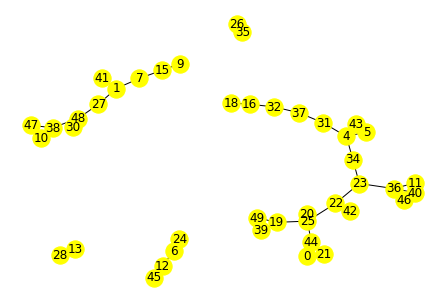

In [ ]:
nx.draw(G,with_labels=True,node_color='yellow')

In [ ]:
cc = list(nx.connected_components(ER))

In [ ]:
ccsize = [len(c) for c in cc]
print(ccsize)

[24, 11, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1]


In [ ]:
largest = cc[ccsize.index(max(ccsize))]
print(largest)

{0, 4, 5, 11, 16, 18, 19, 20, 21, 22, 23, 25, 31, 32, 34, 36, 37, 39, 40, 42, 43, 44, 46, 49}


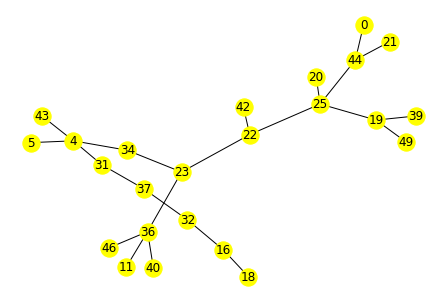

In [ ]:
ER_cc = ER.subgraph(largest)
nx.draw(ER_cc,with_labels=True,node_color='yellow')

(array([ 7., 23., 10.,  7.,  3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

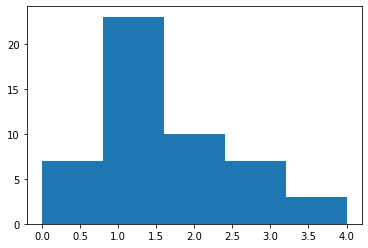

In [ ]:
plt.hist(list(dict(ER.degree()).values()),bins=5)

In [ ]:
#Many lists: enamble average
N = 50
p = 0.05
sample = 100
degrees = []
for _ in range(sample):
    ER = nx.erdos_renyi_graph(N,p)
    degrees = degrees + list(dict(ER.degree()).values())
print(len(degrees))

5000


(array([ 441., 1045., 1373., 1016.,  665.,  315.,  106.,   24.,   10.,
           5.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

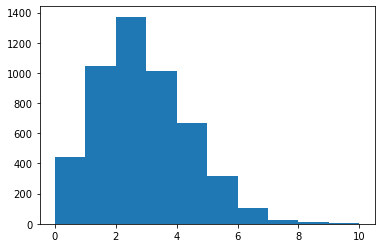

In [ ]:
plt.hist(degrees)

In [ ]:
mean = np.array(degrees).mean()
print(mean)

2.4008


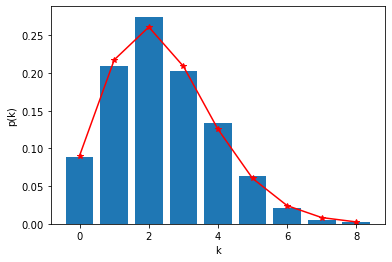

In [ ]:
bins = np.arange(10) - 0.5
plt.hist(degrees,density=True,bins=bins,rwidth=0.8);
x = np.arange(9)
plt.plot(x,poisson.pmf(x, mu = mean),"r*-")
plt.xlabel("k")
plt.ylabel("p(k)")
plt.savefig("ER_kdist%d_%g.pdf" % (N,p))

In [ ]:
h,b = np.histogram(degrees,bins=bins,density=True)
print(h)
print(b)

[0.08828829 0.20920921 0.27487487 0.2034034  0.13313313 0.06306306
 0.02122122 0.0048048  0.002002  ]
[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5]


## Coefficeint of determination

https://en.wikipedia.org/wiki/Coefficient_of_determination

If $\bar{y}$ is the mean of the observed data:
$$\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i $$
then the variability of the data set can be measured with two Mean squared error formulas:
* The sum of squares of residuals, also called the residual sum of squares:
$$SS_\text{res}=\sum_i (y_i - f_i)^2,$$
* The total sum of squares (proportional to the variance of the data):
$$SS_\text{tot}=\sum_i (y_i - \bar{y})^2$$

The most general definition of the coefficient of determination is
$$R^2 = 1 - {SS_{\rm res}\over SS_{\rm tot}} $$

In the best case, the modeled values exactly match the observed values, which results in $SS_\text{res}=0$ and $R^2=1$. A baseline model, which always predicts $\bar y$, will have $R^2=0$.

In [ ]:
# in matrix format, between all pairs of data
np.corrcoef(h, poisson.pmf(x, mu = mean))

array([[1.        , 0.99773327],
       [0.99773327, 1.        ]])

In [ ]:
#or the just between original and fitted, the result is really good.
np.corrcoef(h, poisson.pmf(x, mu = mean))[0,1]

0.9977332747046717

### Assortativity

In [ ]:
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    print(neighdeg)


[3]
[2, 2, 1]
[1, 2, 2, 1]
[4]
[2, 1]
[3, 2]
[2]
[3]
[4]
[2, 1]
[1]
[2, 1]
[1, 2]
[2]
[4, 1, 1]
[4]
[3]
[3, 4, 1]
[3, 2, 4]
[2]
[3, 1, 3, 3]
[1]
[3, 3]
[1]
[3]
[4, 2]
[2, 2]
[4, 3]
[1]
[1, 3, 1, 1]
[2, 2]
[1, 1, 3]
[3]
[4]
[3]
[3]
[4]
[1, 1, 4]
[2]
[4]
[3]
[2, 1, 3]
[3]


In [ ]:
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    print(G.degree(i),np.array(neighdeg).mean())

1 3.0
3 1.6666666666666667
4 1.5
1 4.0
2 1.5
2 2.5
1 2.0
1 3.0
1 4.0
2 1.5
1 1.0
2 1.5
2 1.5
1 2.0
3 2.0
1 4.0
1 3.0
3 2.6666666666666665
3 3.0
1 2.0
4 2.5
1 1.0
2 3.0
1 1.0
1 3.0
2 3.0
2 2.0
2 3.5
1 1.0
4 1.5
2 2.0
3 1.6666666666666667
1 3.0
1 4.0
1 3.0
1 3.0
1 4.0
3 2.0
1 2.0
1 4.0
1 3.0
3 2.0
1 3.0


In [ ]:
G = nx.erdos_renyi_graph(1000,0.01)
maxdegree = max(list(dict(G.degree()).values()))
knn = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    k = G.degree(i)
    num[k] += 1
    knn[k] += np.array(neighdeg).mean()

<ipython-input-48-71ef7fe49261>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(knn/num,"r*-")


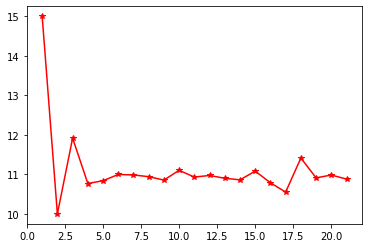

In [ ]:
plt.plot(knn/num,"r*-")

In [ ]:
np.array(list(dict(G.degree()).values())).mean()

9.986

In [ ]:
cond = (num>0)

In [ ]:
pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])

<ipython-input-51-359237f1f6c8>:1: RuntimeWarning: invalid value encountered in true_divide
  pearsonr(np.arange(len(knn))[cond],(knn/num)[cond])


(-0.3264754707472609, 0.14862179071670328)

<ipython-input-52-a8defbde8e35>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot((knn/num)[cond],"r*-")


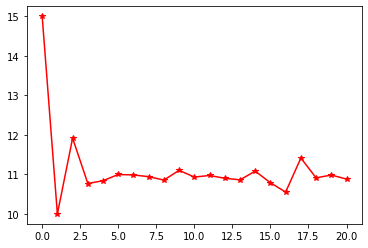

In [ ]:
plt.plot((knn/num)[cond],"r*-")

## Clustering

In [ ]:
np.array(list(dict(nx.clustering(G)).values())).mean()

0.009463622686223307

In [ ]:
nx.diameter(ER)

NetworkXError: Found infinite path length because the graph is not connected

In [ ]:
nx.diameter(ER_cc)

11

# Hands on exercises
Files downloaded from https://networkrepository.com/inf.php

In [ ]:
# prompt: load a file containing edge list with integer indices into networkx graph comments are %

# Load the edge list from the file
GR = nx.read_edgelist("data/inf-euroroad.edges", nodetype=int, comments="%")

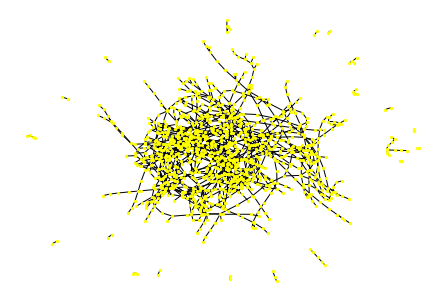

In [ ]:
nx.draw(GR,node_color='yellow',node_size=5)

## Tasks
 0. Load the file `inf-euroroads.edges`
 1. Calculate and plot the degree distribution
 2. Calculate and plot the clustering coefficient as funtions of $k$
 3. Calculate and plot the assortativity
 4. Measure the diameter of the largest component
 5. Do the same for `inf-openflights.edges`
 6. We will discuss the differences

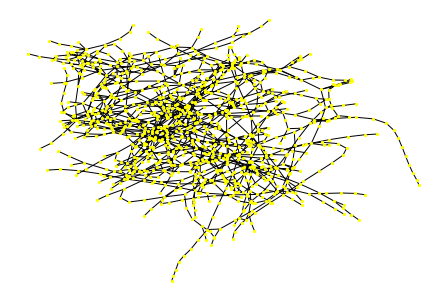

In [ ]:
#largest connected component
cc = list(nx.connected_components(GR))
ccsize = [len(c) for c in cc]
largest = cc[ccsize.index(max(ccsize))]
GR_cc = GR.subgraph(largest)
nx.draw(GR_cc,node_size=5,node_color='yellow')

In [ ]:
max_degree = max(list(dict(GR_cc.degree).values()))

In [ ]:
max_degree

10

In [ ]:
#bins and position for degree distribution
# bins has one more values (telegraph post)
roadbins = np.arange(max_degree+1) + 0.5
roadpos = np.arange(max_degree) +1

In [ ]:
#histogram calculation
h = np.histogram(list(dict(GR_cc.degree).values()),bins=roadbins)
h

(array([127, 554, 174, 112,  46,  15,   5,   5,   0,   1]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]))

<BarContainer object of 10 artists>

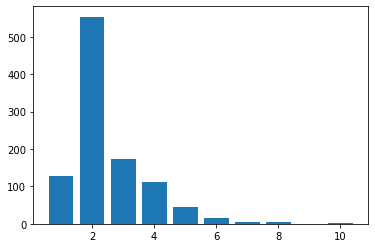

In [ ]:
plt.bar(roadpos,h[0])

In [ ]:
#remove junctions with degree 2
GR_cc2 = GR_cc.copy()

In [ ]:
degd = dict(GR_cc2.degree)
print(list(degd.keys())[list(degd.values()).index(2)])  # Prints george

6


In [ ]:
degd[6]

2

In [ ]:
#remove junctions with degree 2
GR_cc2 = GR_cc.copy()
while 2 in list(dict(GR_cc2.degree).values()):
    degd = dict(GR_cc2.degree)
    twokey = list(degd.keys())[list(degd.values()).index(2)]
    nn = list(GR_cc2.neighbors(twokey))
    GR_cc2.add_edge(nn[0],nn[1])
    GR_cc2.remove_node(twokey)

(array([127.,   0., 173., 111.,  45.,  13.,   5.,   4.,   0.,   1.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 10 Patch objects>)

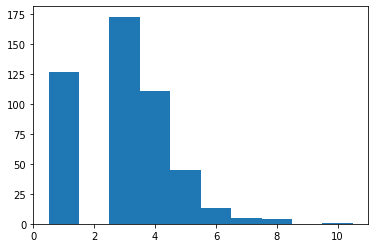

In [ ]:
plt.hist(list(dict(GR_cc2.degree()).values()),bins=roadbins)

In [ ]:
G = GR_cc2
maxdegree = max(list(dict(G.degree()).values()))
knn = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
# go through neighbors:
for i in G.nodes():
    neighdeg = [G.degree(j) for j in G.neighbors(i)]
    k = G.degree(i)
    num[k] += 1
    knn[k] += np.array(neighdeg).mean()

<BarContainer object of 11 artists>

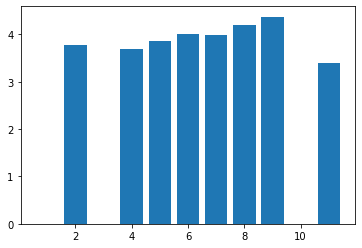

In [ ]:
num[num==0] += 1
plt.bar(np.arange(maxdegree+1)+1,knn/num)

In [ ]:
np.array(list(dict(nx.clustering(G)).values())).mean()

0.07947443417172019

In [ ]:
G = GR_cc2
maxdegree = max(list(dict(G.degree()).values()))
ck = np.zeros(maxdegree+1)
num = np.zeros(maxdegree+1,dtype=int)
clustering = nx.clustering(G)
degree = G.degree()
for i in G.nodes():
    k = degree[i]
    num[k] += 1
    ck[k] += clustering[i]

<BarContainer object of 11 artists>

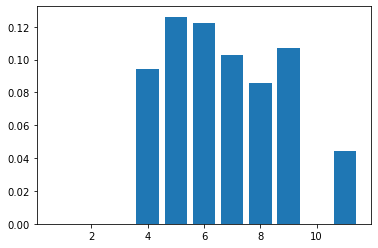

In [ ]:
num[num==0] += 1
plt.bar(np.arange(maxdegree+1)+1,ck/num)

### Other dataset

In [ ]:
GF = nx.read_edgelist("data/inf-openflights.edges", nodetype=int, comments="%")

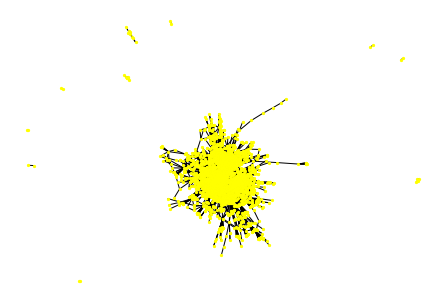

In [ ]:
nx.draw(GF,node_color='yellow',node_size=5)

## Task
 * We will try to redo everything for the other dataset and a Barabási-Albert graph!